In [1]:
import numpy as np

In [2]:
annotation_path = 'anns/EPIC_100_train.pkl'
data = np.load(annotation_path, allow_pickle=True)
data

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
narration_id,,,,,,,,,,,,,,
P01_01_0,P01,P01_01,00:00:01.089,00:00:00.14,00:00:03.37,8,202,open door,open,3,door,3,[door],[3]
P01_01_1,P01,P01_01,00:00:02.629,00:00:04.37,00:00:06.17,262,370,turn on light,turn-on,6,light,114,[light],[114]
P01_01_10,P01,P01_01,00:00:23.340,00:00:24.97,00:00:26.20,1498,1572,open drawer,open,3,drawer,8,[drawer],[8]
P01_01_100,P01,P01_01,00:07:57.919,00:07:59.75,00:08:00.88,28785,28852,take cup,take,0,cup,13,[cup],[13]
P01_01_101,P01,P01_01,00:08:00.020,00:08:01.47,00:08:02.21,28888,28932,open cupboard,open,3,cupboard,3,[cupboard],[3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P37_103_71,P37,P37_103,00:06:16.903,00:06:17.17,00:06:17.67,18858,18883,turn off tap,turn-off,8,tap,0,[tap],[0]
P37_103_72,P37,P37_103,00:06:22.154,00:06:17.86,00:06:23.77,18893,19188,take pan,take,0,pan,5,[pan],[5]
P37_103_73,P37,P37_103,00:06:26.404,00:06:23.45,00:06:32.66,19172,19633,pour out boiled water,pour-out,9,water:boiled,27,[water:boiled],[27]


Number of unique noun-verb pairs with greater than 0 traj:  11148
Number of unique noun-verb pairs with greater than 10 traj:  960
Number of unique noun-verb pairs with greater than 20 traj:  492
Number of unique noun-verb pairs with greater than 30 traj:  314
Number of unique noun-verb pairs with greater than 40 traj:  235
Number of unique noun-verb pairs with greater than 50 traj:  187
Number of unique noun-verb pairs with greater than 60 traj:  145
Number of unique noun-verb pairs with greater than 70 traj:  115
Number of unique noun-verb pairs with greater than 80 traj:  98
Number of unique noun-verb pairs with greater than 90 traj:  81
Number of unique noun-verb pairs with greater than 100 traj:  71
max=1776, min=1, mean=6.02951202009329, std=34.71798485541246


<AxesSubplot:title={'center':'Noun-Verb Pairs with >100 Trajectories'}>

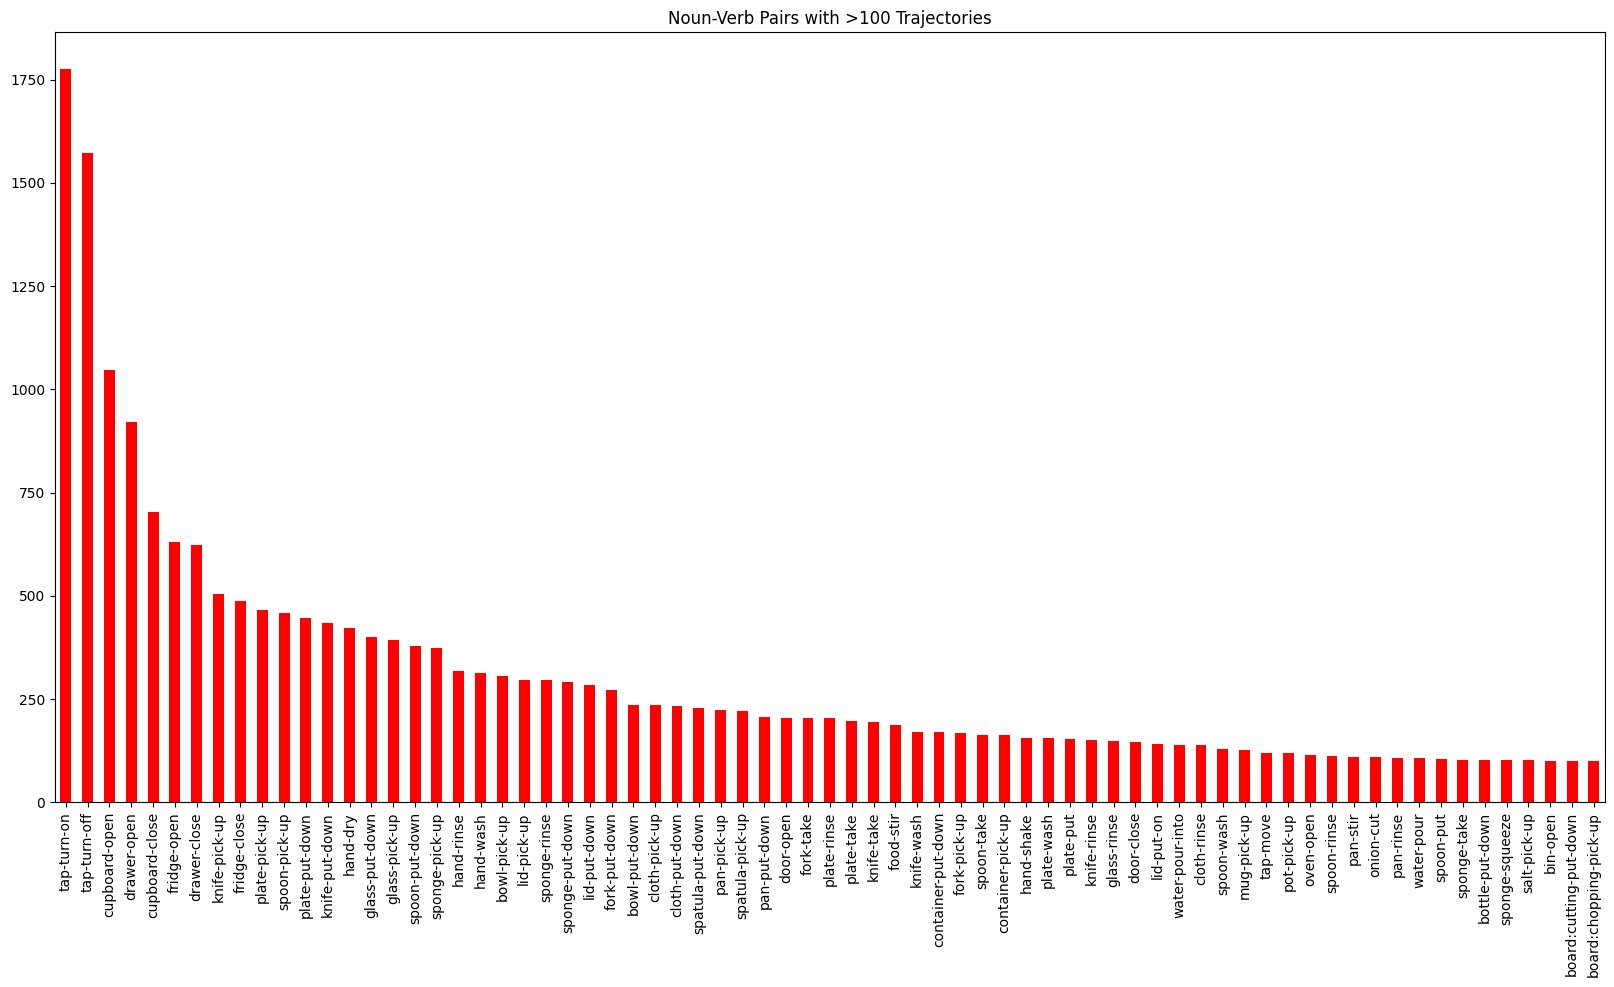

In [3]:
data['noun_verb'] = data[['noun', 'verb']].agg('-'.join, axis=1)
vc = data['noun_verb'].value_counts()
vals = vc.values

for i in range(11):
    print(f'Number of unique noun-verb pairs with greater than {i*10} traj: ', len(vals[vals > i*10]))

print(f'max={vals.max()}, min={vals.min()}, mean={vals.mean()}, std={vals.std()}')

vc[vc > 100].plot(kind='bar', figsize=(20, 10), color='red', fontsize=10, title='Noun-Verb Pairs with >100 Trajectories')


<AxesSubplot:title={'center':'Noun-Verb Pairs with >50 Trajectories'}>

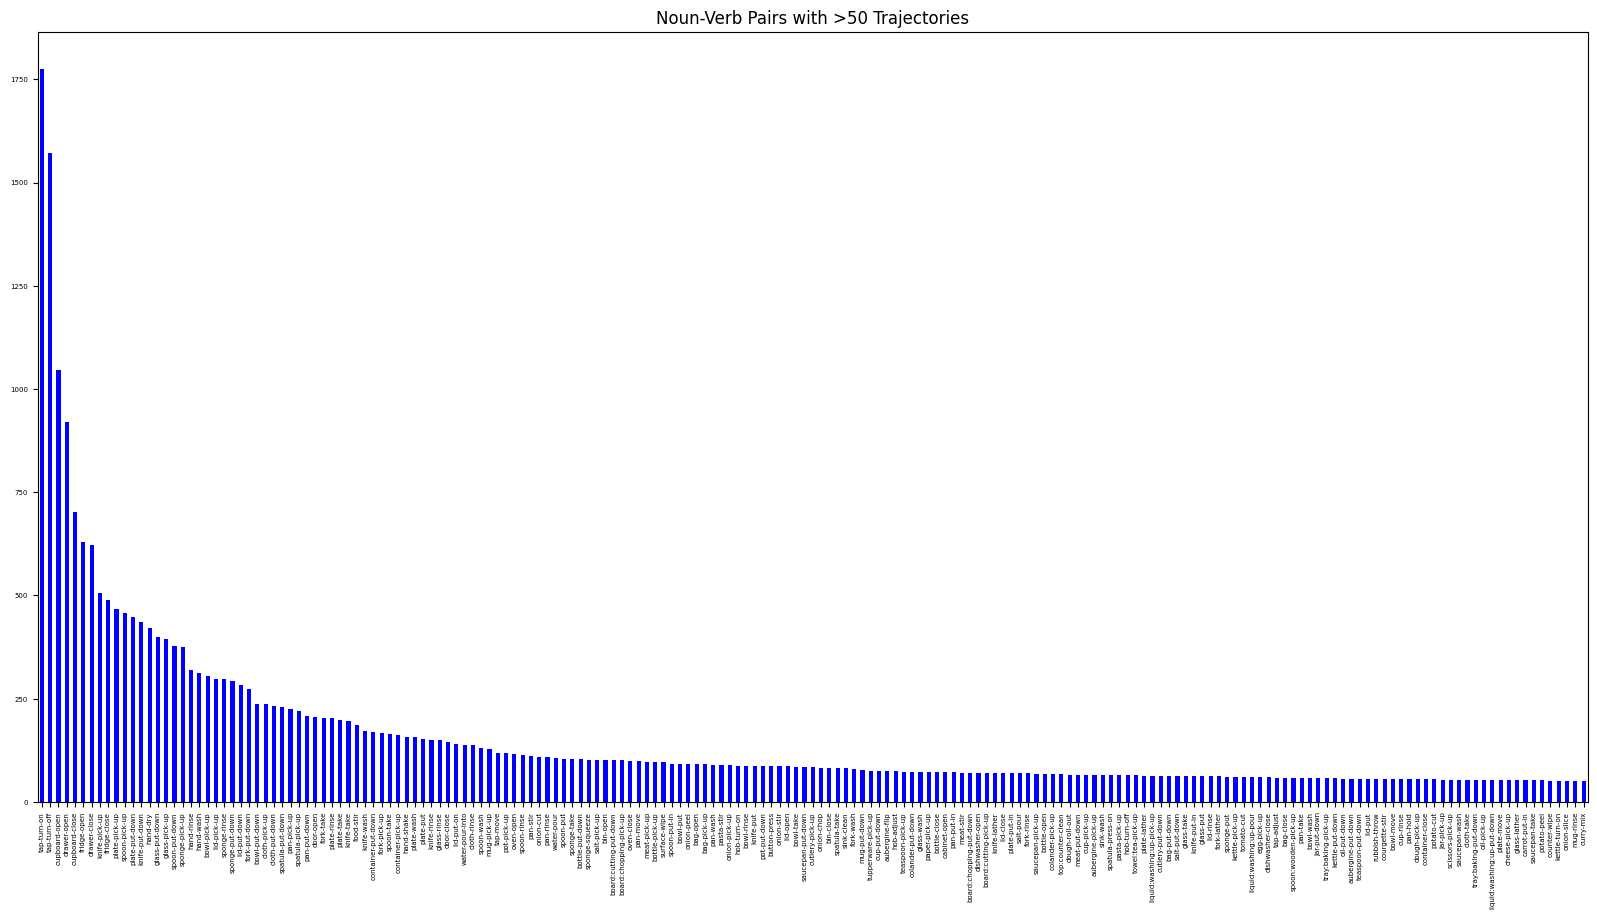

In [4]:
vc[vc > 50].plot(kind='bar', figsize=(20, 10), color='blue', fontsize=5, title='Noun-Verb Pairs with >50 Trajectories')

# Label Based Extraction

In [5]:
vc[vc > 100]

tap-turn-on               1776
tap-turn-off              1572
cupboard-open             1046
drawer-open                920
cupboard-close             703
                          ... 
sponge-squeeze             102
salt-pick-up               102
bin-open                   101
board:cutting-put-down     101
board:chopping-pick-up     101
Name: noun_verb, Length: 71, dtype: int64

In [9]:
des_labels = vc[vc > 100].keys()
new_data = data[data['noun_verb'].isin(des_labels)]
sorted_data = new_data.sort_values(by=['noun_verb'])
sorted_data

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,noun_verb
narration_id,,,,,,,,,,,,,,,
P02_122_30,P02,P02_122,00:01:32.667,00:01:31.92,00:01:33.35,4596,4667,open bin,open,3,bin,36,[bin],[36],bin-open
P01_09_672,P01,P01_09,00:46:33.579,00:46:33.35,00:46:35.10,167601,167706,open bin,open,3,bin,36,[bin],[36],bin-open
P30_11_1,P30,P30_11,00:00:19.230,00:00:17.76,00:00:18.65,1065,1119,open bin,open,3,bin,36,[bin],[36],bin-open
P01_09_703,P01,P01_09,00:48:06.369,00:48:05.93,00:48:06.60,173155,173196,open bin,open,3,bin,36,[bin],[36],bin-open
P02_130_303,P02,P02_130,00:16:59.153,00:16:59.27,00:16:59.83,50963,50991,open bin,open,3,bin,36,[bin],[36],bin-open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P30_05_406,P30,P30_05,00:32:16.200,00:32:12.16,00:32:13.75,115929,116025,pour water into pan,pour-into,9,water,27,"[water, pan]","[27, 5]",water-pour-into
P10_01_114,P10,P10_01,00:13:48.529,00:13:39.93,00:13:50.12,49195,49807,pour the water into the sink,pour-into,9,water,27,"[water, sink]","[27, 63]",water-pour-into
P01_05_58,P01,P01_05,00:02:51.329,00:02:48.84,00:03:00.57,10130,10834,pour water into kettle,pour-into,9,water,27,"[water, kettle]","[27, 44]",water-pour-into


In [10]:
import os
from collections import defaultdict
import tqdm

dict_traj = defaultdict(list)
path_to_frames='/raid/asap7772/epic100/frames'

filter_tasks =  ['bin-open']
sorted_data = sorted_data[sorted_data['noun_verb'].isin(filter_tasks)]

for i in tqdm.tqdm(range(len(sorted_data))):
    ind = sorted_data.index[i]
    folder_path= os.path.join(path_to_frames, sorted_data['participant_id'][ind], 'rgb_frames', str(sorted_data['video_id'][ind]))
    frame_names = sorted(os.listdir(folder_path))
    filter_value = lambda x: sorted_data['start_frame'][ind] <= int(x.split('.')[0].split('_')[-1]) <= sorted_data['stop_frame'][ind]
    filtered_frame_names = list(filter(filter_value, frame_names))
    full_frame_names = [os.path.join(folder_path, frame_name) for frame_name in filtered_frame_names]
    
    assert len(filtered_frame_names) == sorted_data['stop_frame'][ind] - sorted_data['start_frame'][ind] + 1, 'Number of frames in the folder does not match the number of frames in the annotation'
    assert os.path.exists(folder_path) and all(map(os.path.exists, full_frame_names)), f'Folder {folder_path} does not exist'
    
    aux_data = sorted_data.iloc[i]
    
    dict_traj[sorted_data['noun_verb'][ind]].append((full_frame_names, aux_data))
    
    if i > 10:
        break

 10%|▉         | 10/101 [00:08<01:17,  1.17it/s]


In [11]:
import imageio
output_path='/raid/asap7772/epic100/output'

for task in dict_traj:
    os.makedirs(os.path.join(output_path, task), exist_ok=True)
    print('Videos for task: ', task)
    trajs = dict_traj[task]
    for i in tqdm.tqdm(range(len(trajs))):
        files, aux = trajs[i]
        fname = f'{task}/{task}_{aux["video_id"]}.mp4'
        fp = os.path.join(output_path, fname)
        print('Creating {} with length {}'.format(fp, len(files)))
        with imageio.get_writer(fp, mode='I', fps=5) as writer:
            for filename in files:
                image = imageio.v3.imread(filename)
                writer.append_data(image)

Videos for task:  bin-open


  0%|          | 0/11 [00:00<?, ?it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P02_122.mp4 with length 72


[swscaler @ 0x692a7c0] Warning: data is not aligned! This can lead to a speed loss
  9%|▉         | 1/11 [00:00<00:05,  1.97it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x703a7c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P01_09.mp4 with length 106


 18%|█▊        | 2/11 [00:01<00:05,  1.71it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x6a127c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P30_11.mp4 with length 55


 27%|██▋       | 3/11 [00:01<00:04,  1.98it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x72d17c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P01_09.mp4 with length 42


 36%|███▋      | 4/11 [00:01<00:03,  2.24it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x69447c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P02_130.mp4 with length 29


 45%|████▌     | 5/11 [00:02<00:02,  2.58it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x5a4d7c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P01_09.mp4 with length 44


 55%|█████▍    | 6/11 [00:02<00:01,  2.63it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x6c487c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P02_130.mp4 with length 31


 64%|██████▎   | 7/11 [00:02<00:01,  2.95it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x6bf07c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P02_104.mp4 with length 30


 73%|███████▎  | 8/11 [00:03<00:00,  3.19it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x67877c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P04_07.mp4 with length 41


 82%|████████▏ | 9/11 [00:03<00:00,  3.17it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x697f7c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P02_104.mp4 with length 58


 91%|█████████ | 10/11 [00:03<00:00,  2.89it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x6cf67c0] Warning: data is not aligned! This can lead to a speed loss


Creating /raid/asap7772/epic100/output/bin-open/bin-open_P30_11.mp4 with length 107


100%|██████████| 11/11 [00:04<00:00,  2.55it/s]
